In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
ls

Analytics.ipynb             customers_sample.csv
Homework 1 description.pdf  merchant codes list.xls
Useful liks for HW1.docx    transactional_data.csv


In [4]:
cust = pd.read_csv('customers_sample.csv',sep=';',low_memory=False)
trans = pd.read_csv('transactional_data.csv')
codes = pd.read_excel('merchant codes list.xls')

In [5]:
cust.head()

,uid1,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
0,8388.0,46.0,RUSSIA,Kazan,18.02.2017,01.05.2019,0.0,0.0,1.0,0.0
1,17264.0,20.0,RUSSIA,Sevastopol,21.07.2020,03.10.2021,0.0,0.0,1.0,0.0
2,17373.0,31.0,RUSSIA,Kazan,26.02.2016,24.12.2018,0.0,1.0,1.0,0.0
3,26297.0,27.0,RUSSIA,Sevastopol,25.01.2018,16.04.2018,0.0,1.0,1.0,1.0
4,27044.0,41.0,RUSSIA,Sevastopol,17.07.2015,30.07.2016,0.0,0.0,0.0,0.0


In [6]:
trans.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty
0,14164181,10/09/2020,5499,418.00,1
1,15453249,10/08/2020,5541,1034.00,1
2,41571339,12/09/2020,5411,57.98,1
3,2044223,28/06/2021,5921,549.40,4
4,33493259,20/07/2020,4121,578.00,2


In [7]:
codes.head()

,STANDARD MERCHANT CATEGORY CODES\n**Please do not sort this spreadsheet**,Unnamed: 1,Unnamed: 2
0,MCC CODE,Program Type:,NaN
1,0742,Veterinary Services,NaN
2,0763,Agricultural Cooperatives,NaN
3,0780,Landscaping and Horticultural Services,NaN
4,1520,General Contractor/Residential Building,NaN


In [8]:
cust.isna().sum()

uid1                       1038575
customer_age               1038586
country                    1038575
city_of_living             1038575
registration_dt            1038664
website_last_visit_date    1038800
email                      1038575
has_mob_app                1038575
phone_number               1038575
push                       1038575
dtype: int64

In [9]:
cust.shape

(1048575, 10)

In [10]:
trans.isna().sum()

uid1               0
date_pur           0
mcc_id             0
transaction_amt    0
transaction_qty    0
dtype: int64

In [11]:
codes.isna().sum()

STANDARD MERCHANT CATEGORY CODES\n**Please do not sort this spreadsheet**      1
Unnamed: 1                                                                     0
Unnamed: 2                                                                   867
dtype: int64

In [12]:
codes.shape

(882, 3)

In [13]:
codes = codes.rename(columns={'STANDARD MERCHANT CATEGORY CODES\n**Please do not sort this spreadsheet**':'mcc_id',
                             'Unnamed: 1':'program_type'})

In [14]:
codes = codes.iloc[1:,:]

In [15]:
codes = codes.iloc[:,0:2]

In [16]:
codes = codes.reset_index(drop=True)

In [17]:
codes.head()

,mcc_id,program_type
0,0742,Veterinary Services
1,0763,Agricultural Cooperatives
2,0780,Landscaping and Horticultural Services
3,1520,General Contractor/Residential Building
4,1711,"Heating, Plumbing, Air Conditioning Contractors"


In [18]:
trans.head()    

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty
0,14164181,10/09/2020,5499,418.00,1
1,15453249,10/08/2020,5541,1034.00,1
2,41571339,12/09/2020,5411,57.98,1
3,2044223,28/06/2021,5921,549.40,4
4,33493259,20/07/2020,4121,578.00,2


In [19]:
data = pd.merge(trans,codes,on='mcc_id',how='left')

In [20]:
data.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,program_type
0,14164181,10/09/2020,5499,418.00,1,Miscellaneous Food Stores-Convenience Stores a...
1,15453249,10/08/2020,5541,1034.00,1,Service Stations (with or without Ancillary Se...
2,41571339,12/09/2020,5411,57.98,1,Grocery Stores and Supermarkets
3,2044223,28/06/2021,5921,549.40,4,"Package Stores--Beer, Wine, and Liquor"
4,33493259,20/07/2020,4121,578.00,2,Taxicabs and Limousines


In [21]:
data.isna().sum()

uid1                  0
date_pur              0
mcc_id                0
transaction_amt       0
transaction_qty       0
program_type       1030
dtype: int64

In [22]:
cust = cust.dropna()

In [23]:
cust.shape

(9675, 10)

<AxesSubplot:xlabel='has_mob_app', ylabel='count'>

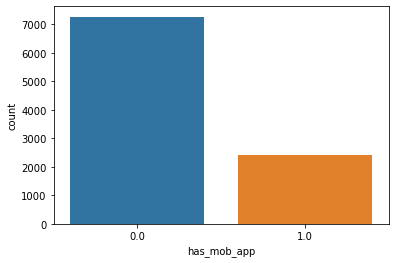

In [24]:
sns.countplot(x=cust['has_mob_app'])

<AxesSubplot:xlabel='phone_number', ylabel='count'>

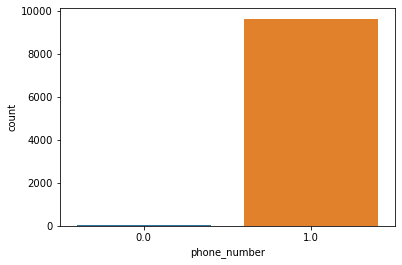

In [25]:
sns.countplot(x=cust['phone_number'])

<AxesSubplot:xlabel='country', ylabel='count'>

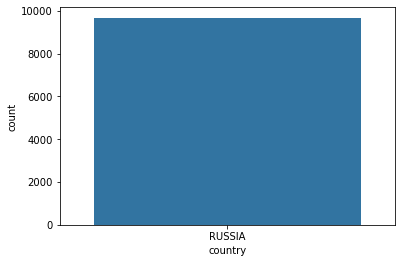

In [26]:
sns.countplot(x=cust.country)

In [27]:
trans_per_program = data.groupby('program_type')['transaction_amt'].sum()

In [28]:
trans_per_program.head()

program_type
Accounting, Auditing, and Bookkeeping Services        91724.92
Advertising Services                                2062133.41
AeroFlot                                            2203577.14
Air Conditioning and Refrigeration Repair Shops         210.00
Air France                                            90538.07
Name: transaction_amt, dtype: float64

In [29]:
cust.isna().sum()

uid1                       0
customer_age               0
country                    0
city_of_living             0
registration_dt            0
website_last_visit_date    0
email                      0
has_mob_app                0
phone_number               0
push                       0
dtype: int64

In [30]:
data2 = pd.merge(data,cust,on='uid1',how='left')

In [31]:
data2.head(50)

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,program_type,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
0,14164181,10/09/2020,5499,418.00,1,Miscellaneous Food Stores-Convenience Stores a...,50.0,RUSSIA,Samara,05.12.2017,14.12.2019,1.0,1.0,1.0,1.0
1,15453249,10/08/2020,5541,1034.00,1,Service Stations (with or without Ancillary Se...,63.0,RUSSIA,Perm,07.11.2017,08.05.2019,0.0,0.0,1.0,0.0
2,41571339,12/09/2020,5411,57.98,1,Grocery Stores and Supermarkets,22.0,RUSSIA,Novokuznetsk,13.11.2019,06.09.2020,0.0,1.0,1.0,1.0
3,2044223,28/06/2021,5921,549.40,4,"Package Stores--Beer, Wine, and Liquor",33.0,RUSSIA,Voronezh,13.10.2018,08.05.2020,0.0,0.0,1.0,0.0
4,33493259,20/07/2020,4121,578.00,2,Taxicabs and Limousines,24.0,RUSSIA,Voronezh,30.09.2016,27.07.2018,1.0,0.0,1.0,0.0
5,41598283,03/07/2021,5411,175.63,1,Grocery Stores and Supermarkets,62.0,RUSSIA,Kaliningrad,20.04.2016,10.10.2020,0.0,0.0,1.0,0.0
6,6379644,26/07/2020,5211,122.00,1,Lumber & Building Materials Stores,47.0,RUSSIA,Novokuznetsk,16.07.2020,05.02.2021,0.0,1.0,1.0,1.0
7,19107233,15/06/2021,5411,842.23,2,Grocery Stores and Supermarkets,42.0,RUSSIA,Ufa,21.01.2017,17.09.2019,0.0,0.0,1.0,0.0
8,45462850,23/06/2021,5815,0.00,0,"Digital Goods – Media, Books, Movies, Music",45.0,RUSSIA,Tomsk,17.12.2013,11.04.2015,0.0,0.0,1.0,0.0
9,13970717,22/09/2020,5541,1360.18,1,Service Stations (with or without Ancillary Se...,45.0,RUSSIA,Saint-Petersburg,26.08.2014,07.12.2020,0.0,1.0,1.0,0.0


<AxesSubplot:>

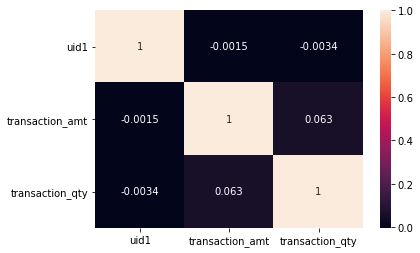

In [32]:
sns.heatmap(data.corr(method='pearson'),annot=True)

In [33]:

from sklearn.cluster import KMeans


import plotly.graph_objects as go

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

In [36]:
data2['program_type'] = le.fit_transform(data2['program_type'])

In [37]:
data2['city_of_living'] = le.fit_transform(data2['city_of_living'])

In [38]:
data2.isna().sum()

uid1                           0
date_pur                       0
mcc_id                         0
transaction_amt                0
transaction_qty                0
program_type                   0
customer_age               30328
country                    30328
city_of_living                 0
registration_dt            30328
website_last_visit_date    30328
email                      30328
has_mob_app                30328
phone_number               30328
push                       30328
dtype: int64

In [39]:
data2.shape

(1048575, 15)

In [40]:
data2 = data2.dropna()

In [41]:
X = data2[['transaction_amt','customer_age','city_of_living','has_mob_app']]

Text(0.5, 1.0, 'Elbow Method For Optimal k')

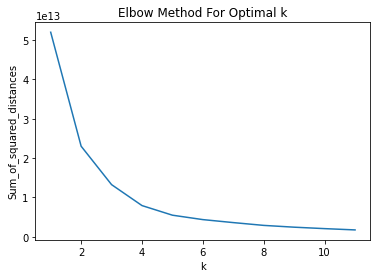

In [42]:
# Implemeting Elbow Method to Determine Optimal Clusters

Sum_of_squared_distances = []
clus_range = range(1,12)
for k in clus_range:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(clus_range, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k') #Showing 3 as optimal Clusters

In [43]:

kmean = KMeans(n_clusters =2,init='k-means++',random_state=2,algorithm='full')

kmean.fit(X)

clus=  kmean.predict(X)

In [44]:
#Showing Centroids

cent = kmean.cluster_centers_


print(cent)

[[7.61225686e+02 3.96799339e+01 9.91530436e+00 3.51078227e-01]
 [5.38451200e+06 6.20000000e+01 0.00000000e+00 0.00000000e+00]]


<AxesSubplot:ylabel='count'>

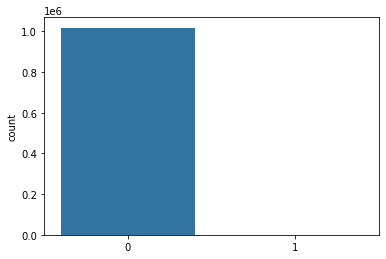

In [45]:
sns.countplot(x=clus)

In [46]:
data2.columns

Index(['uid1', 'date_pur', 'mcc_id', 'transaction_amt', 'transaction_qty',
       'program_type', 'customer_age', 'country', 'city_of_living',
       'registration_dt', 'website_last_visit_date', 'email', 'has_mob_app',
       'phone_number', 'push'],
      dtype='object')

<AxesSubplot:>

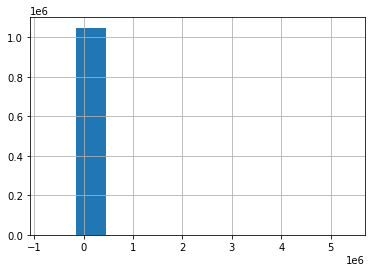

In [47]:
data['transaction_amt'].hist()

<AxesSubplot:>

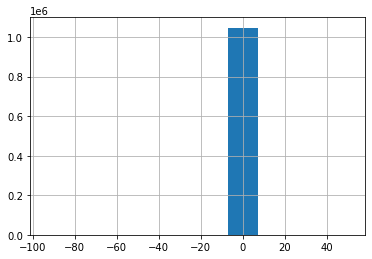

In [48]:
data['transaction_qty'].hist()

<AxesSubplot:>

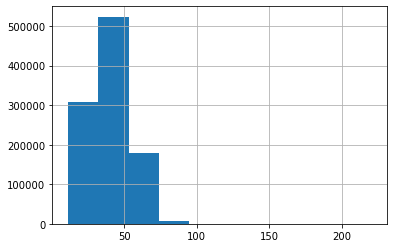

In [49]:
data2['customer_age'].hist()

In [50]:
data2['city_of_living'] = le.inverse_transform(data2['city_of_living'])

In [51]:
moscow = data2.loc[data2['city_of_living']=='Moscow']

In [52]:
moscow

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,program_type,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
11,45428083,06/03/2021,5211,2966.00,1,163,35.0,RUSSIA,Moscow,04.10.2017,06.03.2019,0.0,0.0,1.0,0.0
12,18211347,09/04/2021,5499,433.00,2,178,43.0,RUSSIA,Moscow,29.09.2016,03.03.2020,0.0,0.0,1.0,0.0
14,20701909,09/12/2020,5499,618.46,1,178,57.0,RUSSIA,Moscow,27.12.2016,30.12.2019,0.0,0.0,1.0,0.0
28,35319399,12/07/2020,5921,9.90,1,202,23.0,RUSSIA,Moscow,27.11.2019,02.07.2020,0.0,1.0,1.0,1.0
29,42356205,06/08/2021,5499,252.00,2,178,37.0,RUSSIA,Moscow,09.10.2017,24.08.2021,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048546,31909673,18/07/2021,5977,171.90,1,73,17.0,RUSSIA,Moscow,30.03.2021,30.08.2021,0.0,0.0,1.0,0.0
1048548,19511718,02/03/2020,5411,590.00,1,134,68.0,RUSSIA,Moscow,04.02.2016,21.12.2017,1.0,1.0,1.0,0.0
1048549,13062850,24/06/2021,4121,187.00,1,252,35.0,RUSSIA,Moscow,10.12.2013,17.02.2021,0.0,0.0,1.0,0.0
1048557,49520526,31/08/2021,4131,42.00,1,34,42.0,RUSSIA,Moscow,16.02.2013,09.02.2018,0.0,0.0,1.0,0.0


In [53]:
len(data2['city_of_living'].unique())

21

In [54]:
unique_city = data2['city_of_living'].unique()

In [55]:
unique_city

array(['Samara', 'Perm', 'Novokuznetsk', 'Voronezh', 'Kaliningrad', 'Ufa',
       'Tomsk', 'Saint-Petersburg', 'Moscow', 'Krasnogorsk',
       'Vladivostok', 'Pushkin', 'Volgograd', 'Novosibirsk',
       'Ekaterinburg', 'Kazan', 'Omsk', 'Sevastopol', 'Krasnodar',
       'Odintsovo', 'Obninsk'], dtype=object)

In [56]:
saint_petersburg = data2.loc[data2['city_of_living']=='Saint-Petersburg']

In [57]:
perm = data2.loc[data2['city_of_living']=='Perm']

In [58]:
moscow['transaction_amt'].sum()

100007393.38

In [59]:
moscow['transaction_amt'].mean()

808.395319575453

In [60]:
saint_petersburg['transaction_amt'].sum()

30677914.059999995

In [61]:
saint_petersburg['transaction_amt'].mean()

679.9333775127982

In [62]:
np.var(moscow['transaction_amt'])

35662231.82341071

In [63]:
np.var(saint_petersburg['transaction_amt'])

24501157.181566257

## First Hypothesis Mean amount of transaction in Moscow is Higher than Saint Petersburg

In [64]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_ind(moscow['transaction_amt'],saint_petersburg['transaction_amt'],equal_var=False)
print("P Value:",result.pvalue)
if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject null hypothesis")


P Value: 8.381576429765882e-06
We reject the null hypothesis


<AxesSubplot:>

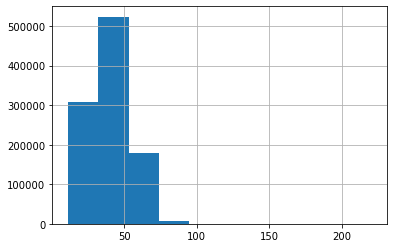

In [65]:
data2['customer_age'].hist(bins=10)

In [66]:
cust_30 = data2.loc[data2['customer_age']<=30]
cust50 = data2.loc[(data2['customer_age']>30) & (data2['customer_age']<=50)]

## Mean transaction amount of customers less than age 30 is less than mean transaction amount of customers between 30 to 50 age

In [67]:
cust_30['transaction_amt'].mean()

533.4797557755057

In [68]:
cust50['transaction_amt'].mean()

865.0750093798506

In [69]:
np.var(cust_30['transaction_amt'])

4005602.1457699267

In [70]:
np.var(cust50['transaction_amt'])

27059928.572510306

In [71]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_ind(cust_30['transaction_amt'],cust50['transaction_amt'],equal_var=False)
print("P Value:",result.pvalue)
if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject null hypothesis")

P Value: 0.0
We reject the null hypothesis


## mean transaction amount of customers who have mobile app is higher than mean transaction amount without mobile app

In [72]:
cust_app = data2.loc[data2['has_mob_app']==1.0]
cust_no_app = data2.loc[data2['has_mob_app']==0.0]

In [73]:
cust_app['transaction_amt'].mean()

788.0462150194317

In [74]:
cust_no_app['transaction_amt'].mean()

754.8631034426517

In [75]:
np.var(cust_app['transaction_amt'])

22555869.676442374

In [76]:
np.var(cust_no_app['transaction_amt'])

66517924.412779644

In [77]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_ind(cust_app['transaction_amt'],cust_no_app['transaction_amt'],equal_var=False)
print("P Value:",result.pvalue)
if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject null hypothesis")

P Value: 0.009513712635960507
We reject the null hypothesis


In [78]:
data2['city_of_living'] = le.fit_transform(data2['city_of_living'])

In [79]:
data2.columns

Index(['uid1', 'date_pur', 'mcc_id', 'transaction_amt', 'transaction_qty',
       'program_type', 'customer_age', 'country', 'city_of_living',
       'registration_dt', 'website_last_visit_date', 'email', 'has_mob_app',
       'phone_number', 'push'],
      dtype='object')

In [80]:
X = data2[['transaction_amt','transaction_qty','program_type','customer_age','city_of_living','has_mob_app',
           'phone_number','push']]

In [81]:
len(X)

1018247

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
xtrain, xtrain = train_test_split(X,test_size=0.5,shuffle=True) ##Low computational Resources. 

In [ ]:
import scipy.cluster.hierarchy as sch

# graph size
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(xtrain, method  = "ward"))

# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
# Fit data to visualizer
visualizer.fit(X)
# Finalize and render figure
visualizer.show()

### Kernel was crashing to perform Agglomerative clustering due to less computational power. We need GPU machine and it was also not possible in Google COlab. However if we split datasets into multiple parts then it can work. It is for our future play with the data.